<a href="https://colab.research.google.com/github/gabriellfelipe7/ExploratoryDataAnalysis_StudentsPerformance/blob/main/Students_Performace_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Students Performance in Exams**
Gabriel Felipe Machado de Oliveira, 2022

# **1. Informações do dataset**

## 1.1. Extração
O dataset utilizado no presente estudo foi extraído da plataforma Kaggle (https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams)

## 1.2. Definições e variáveis
A base de dados traz informações do desempenho de estudantes em uma avaliação a fim de se analisar seus desempenhos e três principais competências: cálculo matemático; leitura; e escrita. Como ferramenta de mensuração foi utilizado um score do teste para cada uma das competências consideradas. O dataset basicamente busca a resposta para questões do tipo:
- Quão eficaz é o curso de preparação para o teste?
- Quais os principais fatores que contribuem para os resultados dos testes?
- Qual seria a melhor maneira de melhorar as notas dos alunos em cada teste?
- Que padrões e interações nos dados você pode encontrar

## 1.3. Variáveis
As colunas da base e suas respectivas explicações seguem abaixo:
- gender: gênero do participante;
- race/ethnicity: grupos de raças/etinias;
- parental level of education: nível de escolaridade dos pais;
- lunch: informações da alimentação do candidato;
- test preparation course: se o participante concluiu ou não o curso preparatório do exame;
- math score: pontuação de matemática do estudante;
- reading score: pontuação de leitura do estudante;
- writing score: pontuação de escrita na escrita.

## 1.4. Tamanho do dataset
O dataset utilizado possui um total de 8 colunas e 1000 linhas.

# **2. Objetivos**

##2.1. Introdução
O objetivo principal do estudo é, através de métodos estatísticos, analisar correlações entre variáveis explicativas e as variáveis respotas (scores). O modelos estatísticos utilizados serão especificados conforme o avanço do estudo e o nível de significância para todos testes seão de 5% (𝛂 = 5%). Serão utilizados testes de hipóteses a fim de responder peguntas previamente realizadas.

## 2.2. Tópicos de abordagem
Como guia para o estudo, utilizou-se de perguntas provocativas, são elas:
- Estudantes de gênero masculinos possuem scores maiores que estudantes do gênero feminino?
- Estudantes que concluíram o curso preparatório alcançaram uma média de score maior que estudantes que não finalizaram o trinamento?
- O nível de escolaridade dos pais possui influência na pontuação dos estudantes em matemática?
- Há correlação entre as três áreas de competência?

# **3. Extração e Limpeza da Base de Dados**
Etapa prática introdutória voltada para limpeza e adequação dos dados. 


In [2]:
#Extração de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts 

In [3]:
#Extração dos dados e visualização
data = pd.read_csv('exams.csv')
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [4]:
#Análise dos tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Há 5 variáveis categóricas e 3 numéricas inteiras.

In [5]:
#Bucando valores nulos
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [6]:
#Buscando valores vazios
data.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


Como visto, os dados estão prontos para serem analisados. Não há valores vazios ou nulos.

# **4. Análise das variáveis quantitativas**
A fim de eventualmente fazer suposições sobre os parâmetros da população, o teste da normalidade das variáveis quantitativas se fez necessário. Trata-se de uma base com 1000 observações (um 𝐧 suficientemente grande), isto é, o Teorema Central do Limite garantiria a normalidade. Entretanto, vamos utilizar um Teste de Normalidade não-paramétrico para verificarmos mais afundo se a mostra de notas dos estudantes nas três competências seguem uma distribuição Normal.


## 4.1. Variavel: 'math score' 


### 4.1.1. Visualização da amostra

Visualização da amostra:

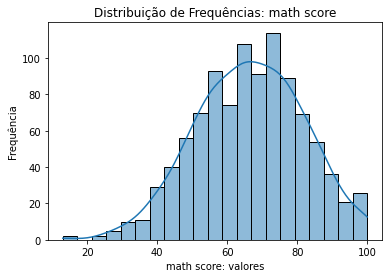

In [44]:
plt.xlabel('math score: valores')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências: math score')
sns.histplot(data=data, x="math score", kde=True)

Através do plot, analisamos algumas possibilidades da distribuição da variável:
- a variável segue uma normalassimétrica para a esquerda;
- média próximo de 70.

### 4.1.2. Escolha do Teste e Aplicação na Amostra

Temos várias opções de Testes Não-Paramétricos que verificam a Normalidade. Vamos optar por usar o Shapiro Wilk. Além desse ser poderoso para tal verificação, nossa base satisfaz seus pré requisitos.

In [14]:
!pip install scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from scipy import stats

In [41]:
x = data['math score']
shapiro_test = stats.shapiro(x)
print('*** RESULTADO - VARIÁVEL: MATH SCORE ***')
print(shapiro_test)

*** RESULTADO - VARIÁVEL: MATH SCORE ***
ShapiroResult(statistic=0.9950758218765259, pvalue=0.0025056363083422184)


### 4.1.3. Decisão

Temos um p-valor < 𝛂 = 0.05. Ou seja, ao nível de confiança de 0.05 a amostra nos fornee evidências que os dados seguem uma distribuição normal provada pelo método de Shapiro-Wilk 

## 4.2. Variável: "reading score"

### 4.2.1. Visualização dos dados

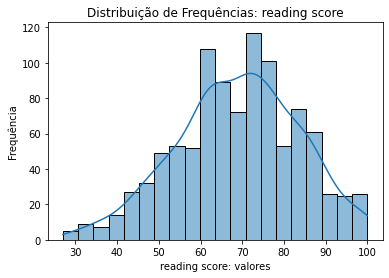

In [45]:
plt.xlabel('reading score: valores')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências: reading score')
sns.histplot(data=data, x="reading score", kde=True)

Algumas possibilidade e considerações podem ser tiradas da variável "reading score", segue:
- possivelmente trata-se de uma distribuição normal com assimetria à esquerda;
- a média é próximo de 70.

###4.2.2. Aplicação do Teste na Amostra

In [42]:
x = data['reading score']
shapiro_test = stats.shapiro(x)
print('*** RESULTADO - VARIÁVEL: READING SCORE ***')
print(shapiro_test)

*** RESULTADO - VARIÁVEL: READING SCORE ***
ShapiroResult(statistic=0.9930004477500916, pvalue=0.00011787991388700902)


### 4.2.3. Decisão
Com um p-valor = 0.00012 < 𝛂 = 0.05, concluímos que ao nível de significância de 5%, os dados nos dão evidências de que a variável "reading score" segue uma distribuição Normal baseada no teste de Shapiro-Wilk. 

## 4.3. Variavel: "writing score"

### 4.3.1. Visualização dos Dados

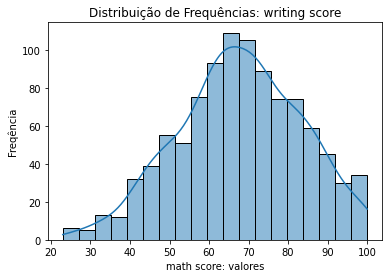

In [24]:
plt.xlabel('math score: valores')
plt.ylabel('Freqência')
plt.title('Distribuição de Frequências: writing score')
sns.histplot(data=data, x="writing score", kde=True)

Aravés da visualização, podemos supor possíveis infrências:
- trata-se de uma variável com distribuição Normal com assimetria à esquerda;
- média próximo  a 65.

### 4.3.2. Aplicação do Teste na Amostra

In [46]:
x = data['writing score']
shapiro_test = stats.shapiro(x)
print('*** RESULTADO - VARIÁVEL: WRITING SCORE ***')
print(shapiro_test)

*** RESULTADO - VARIÁVEL: WRITING SCORE ***
ShapiroResult(statistic=0.9930291175842285, pvalue=0.0001226694294018671)


###4.3.3. Decisão
Com um p-valor = 0.00012 < 𝛂 = 0.05, concluímos que ao nível de significância de 5%, os dados nos dão evidências de que a variável "wiriting score" segue uma distribuição Normal baseada no teste de Shapiro-Wilk.

#5.Análise Gráfica das Correlações

Além de verificarmos a normalidade das variáveis quantitativas, podemos também analisar suas correleções. Para isso, geraremos uma matriz de correlações:

In [47]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


Perceba, que a matriz , de maneira explícita, diz muito pouco sobre as correlações. Colocando-a em um mapa de calor:

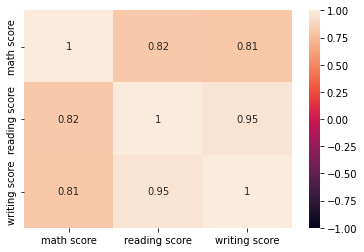

In [55]:
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot = True)

Agora, com uma visualização gráfica, podemos inferir ideias claras acerca das suposições:
- a correlção da pontuação de escrita e leitura é alta, isto é, estudantes que lêem bem também escrevem bem e vice-versa;
- embora a correlação da pontuação no teste de matemática com o teste de leitura e escrita seja menor que entre os dois últimos, há um alta taxa de correlção entre as três competências.

#6.Testes de Hipóteses